In [6]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *

In [113]:
square_size = 50
rows, cols = 4, 9
rotate_amt = (360/rows)

img_width = square_size * cols
img_height = square_size * rows


def mix_colors(sat: int = 100, lum: int = 50) -> list[Color]:
    colors = list[Color]()
    for row in range(rows):
        hue = row * rotate_amt
        for col in range(cols):
            new_hue = (rotate_amt // cols) * col
            color = Color(hue + new_hue, sat, lum)
            colors.append(color)
    return colors


def paint_grid(palette: list[Color], canvas: ImageDraw):
    for row in range(rows):
        for col in range(cols):
            start_x = col * square_size
            start_y = row * square_size
            end_x = (1 + col) * square_size
            end_y = (1 + row) * square_size

            color = palette.pop().as_rgb()

            canvas.rectangle(
                [(start_x, start_y), (end_x, end_y)], color
            )


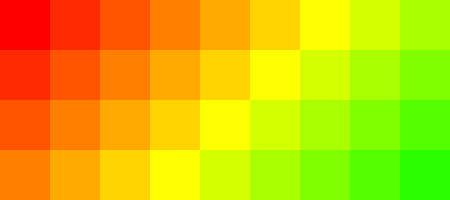

In [114]:
primes_img = Image.new('RGB', (img_width, img_height), 'white')
primes_canvas = ImageDraw.Draw(primes_img)

primes = mix_colors()

paint_grid(primes, primes_canvas)

display(primes_img)

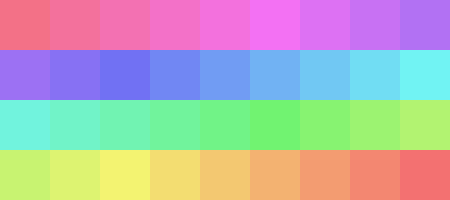

In [109]:
tints_img = Image.new('RGB', (img_width, img_height), 'white')
tints_canvas = ImageDraw.Draw(tints_img)

tints = mix_colors(85, 70)

paint_grid(tints, tints_canvas)

display(tints_img)

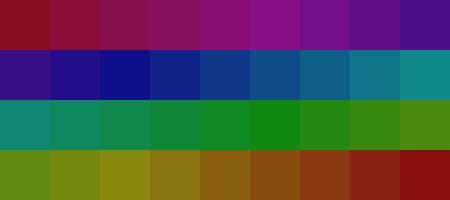

In [110]:
shades_img = Image.new('RGB', (img_width, img_height), 'white')
shades_canvas = ImageDraw.Draw(shades_img)

shades = mix_colors(80, 30)

paint_grid(shades, shades_canvas)

display(shades_img)